In [4]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import seaborn as sns
sns.set_theme(style="whitegrid")
# fig.set_size_inches(18.5, 15.5)
from matplotlib.pyplot import figure

In [5]:
def T(S,a,e,sigma,Cp,dt,T0):
    T=np.zeros(11)
    T[0]=T0
    for i in range(10):
        Fn=(S*(1-a)-4*e*sigma*(T[i])**4)/Cp
        T[i+1]=T[i]+Fn*dt
    return T  

## Question 1

In [6]:
dt=1
S=1372
a=0.3
e=0.61
Cp=105
o=5.67*(10**(-8))
T2=T(S,a,e,o,Cp,dt,0)

<Figure size 432x288 with 0 Axes>

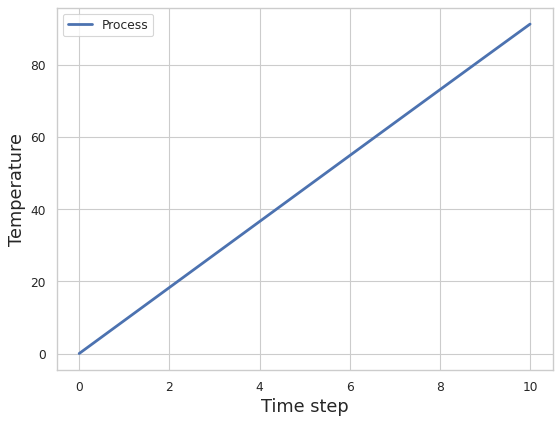

In [9]:
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
plt.plot(T2,linewidth=2.5,label='Process')
fig.suptitle('', fontsize=20)
plt.xlabel('Time step', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.legend()
plt.show()

## Question 2

## Question 3

In [5]:
(T2-np.mean(T2))

array([-4.57061311e+01, -3.65594644e+01, -2.74128070e+01, -1.82662879e+01,
       -9.12036817e+00,  2.39378478e-02,  9.16484228e+00,  1.82995648e+01,
        2.74241180e+01,  3.65330993e+01,  4.56194962e+01])

<Figure size 432x288 with 0 Axes>

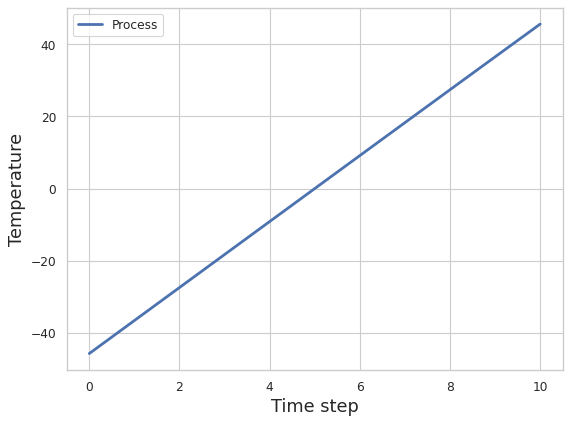

In [6]:
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
plt.plot((T2-np.mean(T2)),linewidth=2.5,label='Process')
fig.suptitle('', fontsize=20)
plt.xlabel('Time step', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.legend()

## Question 4

In [7]:
dt=1
S=1372
a=0.3
e=0.61
Cp=20
o=5.67*(10**(-8))
T2=T(S,a,e,o,Cp,dt,0)

<Figure size 432x288 with 0 Axes>

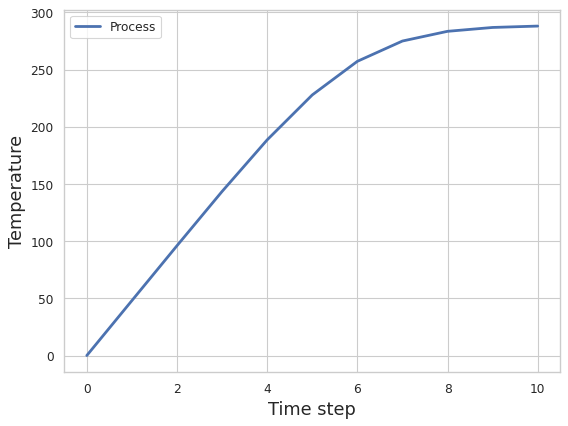

In [8]:
fig = plt.figure()
figure(figsize=(8, 6), dpi=80)
plt.plot(T2,linewidth=2.5,label='Process')
fig.suptitle('', fontsize=20)
plt.xlabel('Time step', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.legend()

### DAY 2

#### Question 1

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### function f is for the process

In [4]:
def f(x):
    return 1.2*x*(1-x)

In [5]:
def gen(x0,f,N):
    X=[x0]
    for i in range(N):
        xi=f(x0)
        X+=[xi]
        x0=xi
    return X
        


In [6]:
Y=gen(0.2,f,40)

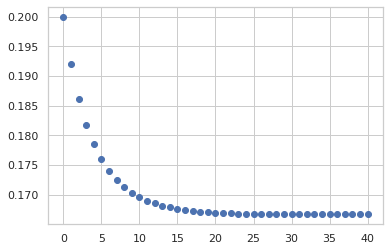

In [7]:
plt.plot(Y,'o')

### Question 2

In [8]:
sigma=0.002
eps=np.random.normal(0,sigma,40)

In [9]:
Y1=Y[1:]
Yi=[]
for i in range(40):
    Yi+=[Y1[i]+eps[i]]
len(Yi)

40

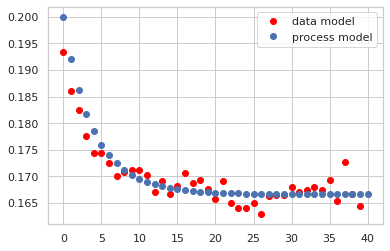

In [10]:
plt.plot(Yi,'o',c='red',label='data model')
plt.plot(Y,'o', label='process model')
plt.legend()
plt.show()

### Question 3

In [11]:
def cost(x1,Y_i,f):
    J=(Y_i[0]-x1)**2
    for i in range(1,len(Y_i)):
        J=J+(Y_i[i]-f(x1))**2 
        x1=f(x1)
    return J

In [12]:
cost(Y[0],Yi,f)

0.0002630524468595853

In [13]:
J=[]
N=40
X2=np.linspace(0,0.7,200)
for i in range(len(X2)):
    J+=[cost(X2[i],Yi,f)]


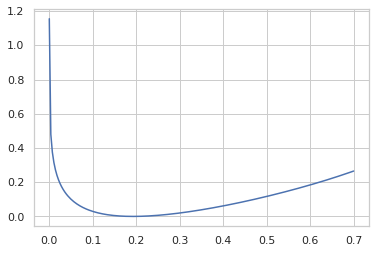

In [14]:
plt.plot(X2,J)

### Question 4

#### Minimum of the cost function

In [46]:
x11=X2[np.argmin(J)]
x11

0.19346733668341706

In [50]:
x22=1.2*x11*(1-x11)
x22

0.18724527158405088

In [51]:
x22=f(x11)
x22

0.18724527158405088

In [52]:
p=np.array([1.2,-1.2,x11])
print(np.roots(p))

[0.79795506 0.20204494]


### Tutorial 3

In [25]:
def process(x0,N):
#N is the total number of state estimates, including initial condition x0
    x=np.zeros(N)
    x[0]=x0
    for i in range(N-1):
        x[i+1]=1.2*x[i]*(1-x[i])
    return x


In [39]:
x0=0.2
N=41
x=process(x0,N)
x

array([0.2       , 0.192     , 0.1861632 , 0.18180776, 0.17850443,
       0.17596872, 0.17400448, 0.1724723 , 0.17127073, 0.17032448,
       0.16957686, 0.16898466, 0.16851461, 0.16814093, 0.16784347,
       0.16760644, 0.16741743, 0.1672666 , 0.16714618, 0.16705   ,
       0.16697316, 0.16691175, 0.16686266, 0.16682341, 0.16679204,
       0.16676694, 0.16674688, 0.16673083, 0.16671799, 0.16670772,
       0.16669951, 0.16669294, 0.16668768, 0.16668348, 0.16668012,
       0.16667743, 0.16667527, 0.16667355, 0.16667218, 0.16667107,
       0.16667019])

#### Question 2

In [40]:
def data(x,sigma):
    N=np.size(x)
    y=np.zeros(N-1)
    eps=np.random.normal(0,sigma)
    y[0]=x[1]+eps
    for i in range(1,N-1):
        sig1=sigma+0.002
        eps=np.random.normal(0,sig1)
        y[i]=x[i+1]+eps
        sigma=sig1
    return y

In [41]:
y=data(x,0.002)
y

array([0.18881408, 0.18265846, 0.17458548, 0.17272367, 0.17989656,
       0.15433666, 0.18099859, 0.14345436, 0.18090271, 0.20375578,
       0.16956994, 0.19503098, 0.15602602, 0.17057219, 0.16711372,
       0.13477615, 0.15965647, 0.16233017, 0.18986222, 0.19081572,
       0.22996762, 0.14452591, 0.23006285, 0.21822956, 0.14963402,
       0.10709591, 0.15694225, 0.15623917, 0.16288701, 0.19614082,
       0.20708187, 0.15127194, 0.2090775 , 0.23643247, 0.1650307 ,
       0.19314576, 0.04961576, 0.16126825, 0.18967912, 0.1135983 ])

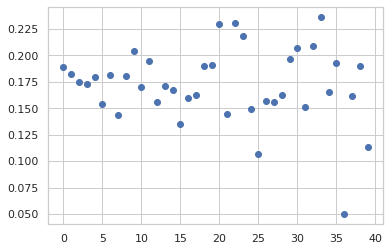

In [42]:
plt.plot(y,"o")

#### Question 3

In [43]:
def T(sigma,N):
    tau=[sigma]
    for i in range(N-1):
        sig=sigma+0.002
        tau+=[sig]
        sigma=sig
    return tau
    
def cost_fun(x1,ydata,sigma):
    Ndata=len(ydata)
    x=process(x1,Ndata)
    tau=T(sigma,Ndata)
    cost=0
    for i in range(Ndata):
        cost=cost+(1/tau[i]**2)*(x[i]-ydata[i])**2
    return cost

In [44]:
x1_range=np.linspace(0,0.7,200)
ydata=y
sigma=0.002

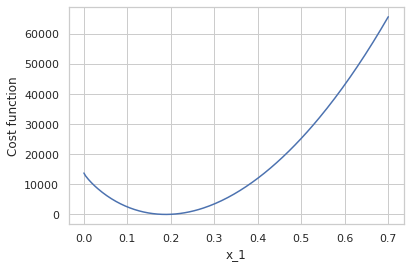

In [45]:
J=np.zeros(len(x1_range))
for i in range(len(x1_range)):
    J[i]=cost_fun(x1_range[i],ydata,sigma)
figure(2)
plt.plot(x1_range,J,markersize=1)
plt.ylabel('Cost function')
plt.xlabel('x_1')
plt.show()

#### Question 4

In [46]:
Y=np.zeros((2000,40))
for i in range(2000):
    y=data(x,sigma)
    Y[i,:]=y
    

In [47]:
cov=np.cov(Y)
cov

array([[ 2.57039191e-03, -6.15429799e-04,  1.03859548e-03, ...,
         4.73897104e-04,  8.41786648e-05, -5.25632422e-05],
       [-6.15429799e-04,  2.00463347e-03, -7.55748124e-04, ...,
        -1.97258760e-04, -2.38345733e-04, -4.74532527e-04],
       [ 1.03859548e-03, -7.55748124e-04,  3.29408345e-03, ...,
         1.90952243e-04, -6.63100303e-04, -6.29127328e-04],
       ...,
       [ 4.73897104e-04, -1.97258760e-04,  1.90952243e-04, ...,
         2.49740923e-03, -1.30747256e-04, -1.91699437e-04],
       [ 8.41786648e-05, -2.38345733e-04, -6.63100303e-04, ...,
        -1.30747256e-04,  2.48930077e-03, -2.65838895e-04],
       [-5.25632422e-05, -4.74532527e-04, -6.29127328e-04, ...,
        -1.91699437e-04, -2.65838895e-04,  3.21395020e-03]])

#### Question 5

In [48]:
def cost2(xdat,ydat,cov):
    r1= np.zeros((40,1))
    for i in range(40):
        r1[i]=xdat[i]-ydat[i]
    cost=(r1.T)@np.linalg.inv(cov)@(r1)
    return cost

In [50]:
r1= np.zeros((40,1))
xdat=x
ydat=y
for i in range(40):
    r1[i]=xdat[i]-ydat[i]

In [51]:
np.shape(np.linalg.inv(cov))

(2000, 2000)

In [52]:
np.shape(r1.T)

(1, 40)

In [53]:
xdat=x[1:]
ydat=y
cost2(xdat,ydat,cov)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2000 is different from 40)

In [ ]:
x1_min=x1_range[argmin(J)]
print('Minumum occurs at x1=',x1_min)
x_filt=process(x1_min,2)
print('Filtered x2=',x_filt[1])

In [54]:
p=np.array([1.2,-1.2,x1_min])
print(roots(p))

NameError: name 'array' is not defined

#### Week 2 day 2

In [55]:
def dim(X,Y:
    d1=np.shape(X)
    d2=np.shape(Y)
    print(" dimension of mu is:",d1)
    print(" dimension of Hx is", d2)

SyntaxError: invalid syntax (<ipython-input-55-a71892f97621>, line 3)

### Exercise 3: Bayes

In [56]:
Sigmax=np.array([[1,0.61,0.22],
              [0.61,1,0.37],
              [0.22,0.37,1]])
Sigmay=0.5*np.eye(2)

In [57]:
Y=np.array([16,23])

In [58]:
H=np.eye(2,3,1)
H

array([[0., 1., 0.],
       [0., 0., 1.]])

### Find the gain

In [59]:
K=Sigmax@H.T@np.linalg.inv(Sigmay+H@Sigmax@H.T)

In [60]:
K

array([[0.39449151, 0.04935876],
       [0.64507122, 0.0875491 ],
       [0.0875491 , 0.64507122]])

#### posterior mean

In [61]:
mu=18*np.ones(3)

In [62]:
posmean=mu+K@(Y-H@mu)
posmean

array([17.4578108 , 17.14760305, 21.05025791])

#### posterior covariance

In [63]:
poscov=(np.eye(3)-K@H)@Sigmax
poscov

array([[0.74850125, 0.19724575, 0.02467938],
       [0.19724575, 0.32253561, 0.04377455],
       [0.02467938, 0.04377455, 0.32253561]])

### b) Find the gain K1, posmean1, and poscov1

In [64]:
Sigmax1=np.eye(3)
Sigmay1=Sigmay

In [65]:
K1=Sigmax1@H.T@np.linalg.inv(Sigmay1+H@Sigmax1@H.T)
K1

array([[0.        , 0.        ],
       [0.66666667, 0.        ],
       [0.        , 0.66666667]])

In [66]:
posmean1=mu+K1@(Y-H@mu)
posmean1

array([18.        , 16.66666667, 21.33333333])

In [67]:
poscov1=(np.eye(3)-K1@H)@Sigmax1
poscov1

array([[1.        , 0.        , 0.        ],
       [0.        , 0.33333333, 0.        ],
       [0.        , 0.        , 0.33333333]])

#### week 2 day 10

In [78]:
def jac(x,alpha):
    M=np.zeros((len(x),len(x)))
    for i in range(len(x)):
        M[i,i]=alpha-2*alpha*x[i]
    return M
    

In [ ]:
def karmal_ext(q,r,alpha,y,h,M):
    a1=M[0]*0
    b1=q**2+M[0]*1*M[0]
    k1=b1*1*(1/(1*b1*1+r**2))
    a2=a1+k1*(y[1]-1*a1)
    b2=(1-k1*1)*b1
    meanfor=np.array([a1])
    meanfil=np.array([a2])
    sigfor=np.array([b1])
    sigfil=np.array([b2])
    for i in range(T-1):
        MT=M[i+1]
        mu1=MT*meanfil[i]
        sig1=q**2+MT*sigfil[i]*MT
        k1=sigfor[i]*h[i+2]*(1/(h[i+2]*sigfor[i]*h[i+2]+r**2))
        mu2=mu1+k1*(y[i+2]-mu1)
        sig2=(1-k1*h[i+2])*sig1
        meanfor=np.append(meanfor,mu1)
        meanfil=np.append(meanfil,mu2)
        sigfor=np.append(sigfor,sig1)
        sigfil=np.append(sigfil,sig2)
    return meanfor,meanfil,sigfor,sigfil
        
        

####  Final lab

In [149]:
n=5
B=0.125*np.diag(np.ones(n-1),-1)+0.5*np.diag(np.ones(n))+0.125*np.diag(np.ones(n-1),1)
B

array([[0.5  , 0.125, 0.   , 0.   , 0.   ],
       [0.125, 0.5  , 0.125, 0.   , 0.   ],
       [0.   , 0.125, 0.5  , 0.125, 0.   ],
       [0.   , 0.   , 0.125, 0.5  , 0.125],
       [0.   , 0.   , 0.   , 0.125, 0.5  ]])

In [141]:
R=0.2*np.ones(5).T


In [142]:
xb=np.array([13,13,15,19,17]).T


In [143]:
H=np.eye(5)

In [145]:
Y=np.zeros(5)
eps=np.random.normal(0,0.2,5)
eta=np.random.normal(0,0.5,5)
Y=H@xb+H@eta+eps


array([12.18059873, 13.6340174 , 15.80098627, 19.2973198 , 17.09064535])

In [74]:
K=B@H.T@(np.linalg.inv(H@B@H.T+R))
K.shape

(5, 5)

In [75]:
xhat=xb+K@(Y-H@xb)
xhat

array([12.11647332, 13.59177236, 15.29111109, 19.05420362, 16.7826589 ])

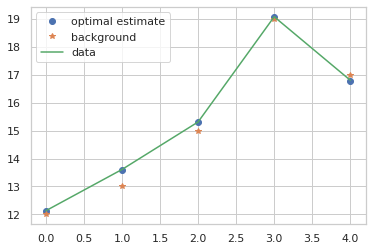

In [76]:
plt.plot(xhat,'o',label='optimal estimate')
plt.plot(xb,'*',label='background')
plt.plot(Y,label='data')
plt.legend()

### Final Quiz 2020

In [15]:
def Var(B,H,R,y,xb):
    K=(B@H.T)*(1/(H@B@H.T+R))
    xhat=xb+K*(y-H@xb)
    return xhat,K

In [16]:
B=np.array([[1,0.25],[0.25,1]])
y=4
xb=np.array([10,5])
R=0.25
H=np.array([0,1]).T


In [17]:
xhat1,k1=Var(B,H,R,y,xb)

In [18]:
xhat1

array([9.8, 4.2])

#### Question 2i

In [19]:
R1=0.25*np.ones(12)
Y1=np.array([80,90,110,160,80,20,10,40,70,100,110,80])
xb1=np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4])
H1=np.eye(12)
B1=0.25*np.diag(np.ones(11),-1)+0.1*np.diag(np.ones(12))+0.25*np.diag(np.ones(11),1)

In [20]:
def Var1(B,H,R,y,xb):
    K=(B@H.T)@(np.linalg.inv(H@B@H.T+R))
    xhat=xb+K@(y-H@xb)
    return xhat,K   

In [22]:
xhat2,K2=Var1(B1,H1,R1,Y1,xb1)

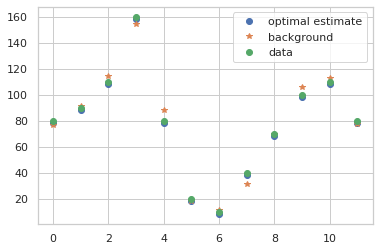

In [23]:
plt.plot(xhat2,'o',label='optimal estimate')
plt.plot(xb1,'*',label='background')
plt.plot(Y1,'o',label='data')
plt.legend()

#### Question 2 ii

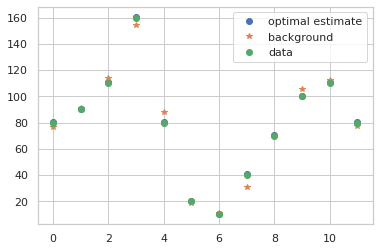

In [24]:
R2=0.25*np.ones(12)
Y2=np.array([80,90,110,160,80,20,10,40,70,100,110,80])
xb2=np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4])
H2=np.eye(12)
B2=0.25*np.diag(np.ones(11),-1)+0.25*np.diag(np.ones(12))+0.25*np.diag(np.ones(11),1)
xhat3,K3=Var1(B2,H2,R2,Y2,xb2)
plt.plot(xhat3,'o',label='optimal estimate')
plt.plot(xb2,'*',label='background')
plt.plot(Y2,'o',label='data')
plt.legend()

#### 2 iii

In [25]:
R3=0.25*np.ones(10)
Y3=np.array([80,90,110,160,80,20,70,100,110,80])
xb3=np.array([76.9,91,114.2,154.2,88.1,18.6,11.4,31.1,69.6,105.7,112.7,77.4])
H3=np.zeros((10,12))
for i in range(6):
    H3[i,i]=1
for i in range(4):
    H3[9-i,11-i]=1
B3=0.25*np.diag(np.ones(11),-1)+0.25*np.diag(np.ones(12))+0.25*np.diag(np.ones(11),1)


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

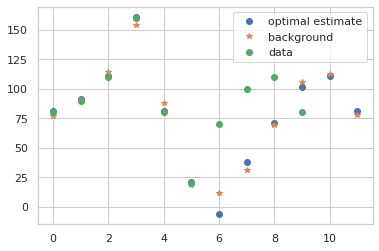

In [26]:
xhat4,K4=Var1(B3,H3,R3,Y3,xb3)
plt.plot(xhat4,'o',label='optimal estimate')
plt.plot(xb3,'*',label='background')
plt.plot(Y3,'o',label='data')
plt.legend()


### Tutorial stochastic process

In [30]:
def proc(N,alph,q):
    X=np.zeros(N+1)
    x0=np.random.normal(0,1)
    delt=np.random.normal(0,q,N)
    X[0]=x0
    for i in range(N):
        X[i+1]=alph*X[i]+delt[i]
    return X

In [31]:
X=proc(100,0.7,0.5)

In [32]:
def dat(x,r):
    x1=x[1:]
    y=np.zeros(len(x1))
    eps=np.random.normal(0,r,len(x1))
    for i in range(len(x1)):
        if i not in range(40,44) and i not in range(80,84):
            y[i]=x1[i]+eps[i]
    return y


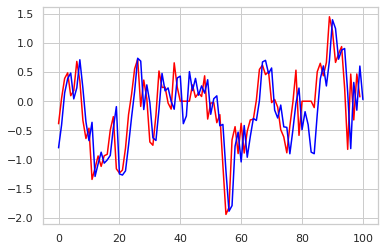

In [33]:
y=dat(X,0.1)
plt.plot(y,c='red')
plt.plot(X,c='blue')